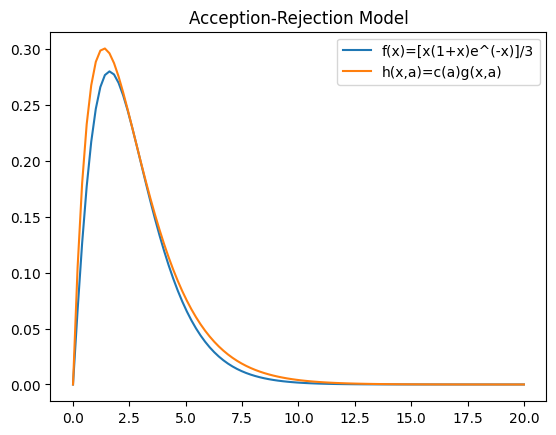

In [2]:
import random
import math
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# HW 3 Problem 1 Part d

def f(x):
  y = (1/3)*x*(1+x)*math.exp(-x)
  return y

def c(a):
  y = math.exp(-a)/(3*a**2*(1-a))
  return y

def g(x,a):
  y = a**2*x*math.exp(-x*a)
  return y

a = math.sqrt(3)-1

x = np.linspace( 0, 20, 100 )
f = [ f(xi) for xi in x ]
cg = [ c(a)*g(xj,a) for xj in x ]
plt.plot( x, f, label="f(x)=[x(1+x)e^(-x)]/3" )
plt.plot( x, cg, label="h(x,a)=c(a)g(x,a)" )

plt.title( "Acception-Rejection Model" )
plt.legend()

plt.show()



In [54]:
## HW 3 Problem 2 Part e

cell_matrix = np.array([[9/10, 1/10, 0],[0, 7/8, 1/8],[2/5, 0, 3/5]])
print( f"The transition matrix for p^50 is:\n{ np.linalg.matrix_power(cell_matrix, 50)}" )


## Part f
def sample_markov( sample_size, transition_matrix):

  states = [0]
  state = 0

  while len(states) < sample_size:
    u = random.uniform(0,1)
    cdf = 0
    state = states[-1]

    for i in range( 0, len(transition_matrix[state] )):
      cdf += transition_matrix[state][i]

      if( u < cdf ):
        states.append( i )
        break

  return states

samples = 10**5
sample_states = sample_markov( samples, cell_matrix )
print(f"\n\nThe fraction of {samples} samples that have state G is: {sample_states.count(0)/samples}")

The transition matrix for p^50 is:
[[0.48780487 0.3902439  0.12195122]
 [0.4878049  0.3902439  0.12195121]
 [0.48780484 0.39024392 0.12195124]]


The fraction of 100000 samples that have state G is: 0.48611


In [93]:
## HW 3 Problem 4 Part b

markov_matrix = np.array([[1/2, 1/2, 0, 0, 0, 0],[0, 1/2, 1/2, 0 , 0, 0 ],[1/3, 0, 1/3, 1/3, 0, 0],[0, 0, 0, 1/2, 1/2, 0],[0, 0, 0, 0, 0, 1],[0, 0, 0, 0, 1, 0]])
p5 = np.linalg.matrix_power(markov_matrix, 5)
print( f"The transition matrix for p^5 is:\n{ p5 }\n\np_(1,4)={p5[0,3]:.4f}" )

def sample_markov2( sample_size, transition_matrix):

  states = [0]
  state = 0

  while len(states) < sample_size:

    for i in range( 0, 5):
      index_value = random.randint(0,5)


      while transition_matrix[state][index_value] == 0:
        index_value = random.randint(0,5)

      state = index_value


    states.append( state )
    state = 0


  return states


samples = 10**5
sample_states2 = sample_markov2( samples, markov_matrix )
print(f"\n\nThe fraction of {samples} samples that have state 4 after 5 steps from state 1 is: {sample_states2.count(3)/samples}")

The transition matrix for p^5 is:
[[0.20717593 0.25347222 0.24537037 0.17592593 0.07638889 0.04166667]
 [0.16358025 0.20717593 0.1716821  0.16358025 0.18287037 0.11111111]
 [0.11445473 0.16358025 0.14994856 0.11445473 0.2029321  0.25462963]
 [0.         0.         0.         0.03125    0.65625    0.3125    ]
 [0.         0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.         0.        ]]

p_(1,4)=0.1759


The fraction of 100000 samples that have state 4 after 5 steps from state 1 is: 0.17402
